Imagen cargada correctamente.


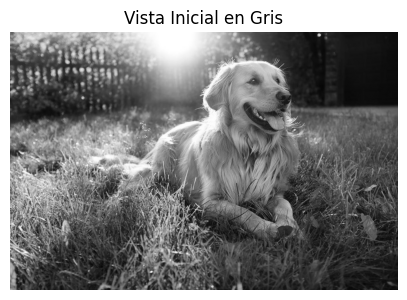

5 filtros disponibles.
Generando visualizaciones de convolución...


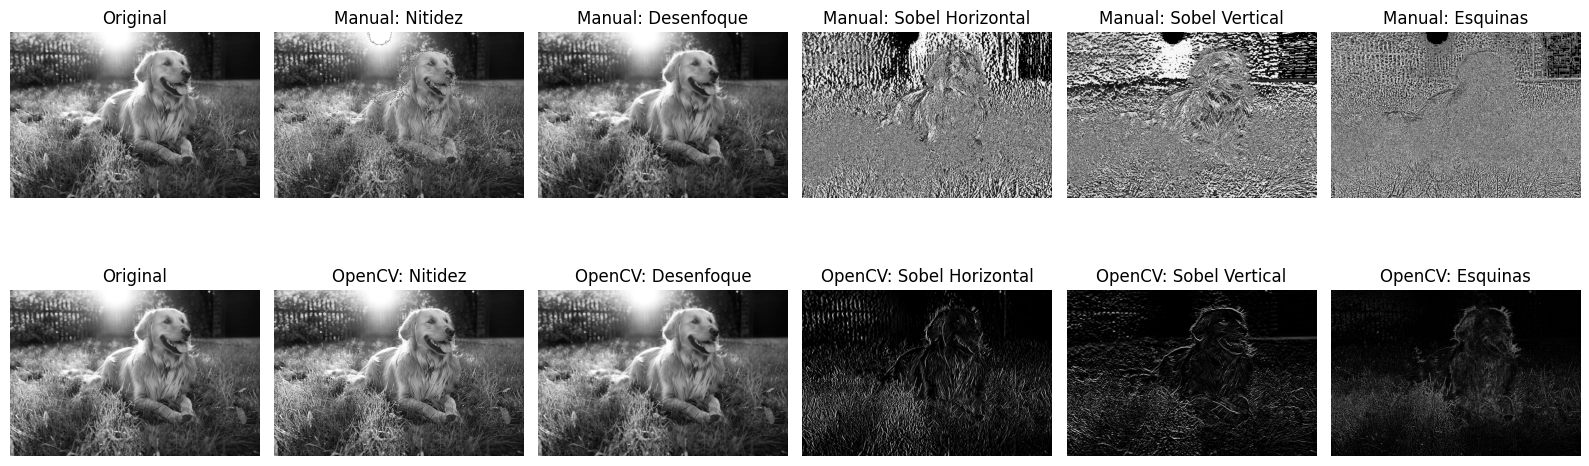


Explora con filtros personalizados:
Configura tu kernel personalizado:


interactive(children=(IntSlider(value=10, description='Alred.'), IntSlider(value=50, description='Centro'), Ou…

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from google.colab.patches import cv2_imshow
from ipywidgets import interact, IntSlider
from IPython.display import clear_output

# Descarga y lectura de imagen
def obtener_imagen_gris():
    enlace = "https://hoycuriosidades.com/wp-content/uploads/2021/07/golden-retriever2.jpg"
    destino = "perro.jpg"
    urllib.request.urlretrieve(enlace, destino)
    imagen_bgr = cv2.imread(destino)
    return cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)

# Aplicación de kernel manual con padding reflectante
def aplicar_convolucion(imagen, filtro):
    altura, ancho = imagen.shape
    kh, kw = filtro.shape
    pad_h, pad_w = kh // 2, kw // 2

    extendida = np.pad(imagen, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')
    salida = np.zeros_like(imagen)

    for fila in range(altura):
        for col in range(ancho):
            zona = extendida[fila:fila+kh, col:col+kw]
            salida[fila, col] = np.sum(zona * filtro)

    return np.clip(salida, 0, 255).astype(np.uint8)

# Colección de filtros comunes
def filtros_predefinidos():
    return {
        'Nitidez': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
        'Desenfoque': np.ones((3, 3)) / 9,
        'Sobel Horizontal': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
        'Sobel Vertical': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
        'Esquinas': np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    }

# Comparativa entre convolución manual y con OpenCV
def visualizar_comparacion(imagen, filtros):
    columnas = len(filtros) + 1
    fig, ejes = plt.subplots(2, columnas, figsize=(16, 6))

    ejes[0, 0].imshow(imagen, cmap='gray')
    ejes[0, 0].set_title('Original')
    ejes[0, 0].axis('off')
    ejes[1, 0].imshow(imagen, cmap='gray')
    ejes[1, 0].set_title('Original')
    ejes[1, 0].axis('off')

    for idx, (nombre, filtro) in enumerate(filtros.items(), start=1):
        manual = aplicar_convolucion(imagen, filtro)
        opencv = cv2.filter2D(imagen, -1, filtro)

        ejes[0, idx].imshow(manual, cmap='gray')
        ejes[0, idx].set_title(f'Manual: {nombre}')
        ejes[0, idx].axis('off')

        ejes[1, idx].imshow(opencv, cmap='gray')
        ejes[1, idx].set_title(f'OpenCV: {nombre}')
        ejes[1, idx].axis('off')

    plt.tight_layout()
    plt.show()

# Explorador de filtros personalizados en Colab
def interfaz_interactiva(imagen):
    def filtrar(d=10, c=50):
        clear_output(wait=True)
        base = (-d / 10) * np.ones((3, 3))
        base[1, 1] = c / 10

        resultado = cv2.filter2D(imagen, -1, base)

        plt.figure(figsize=(5, 5))
        plt.imshow(resultado, cmap='gray')
        plt.title(f'Centro: {c/10:.1f}, Alred: {-d/10:.1f}')
        plt.axis('off')
        plt.show()

        print("Kernel aplicado:")
        print(np.round(base, 2))

    print("Configura tu kernel personalizado:")
    interact(filtrar,
             c=IntSlider(min=0, max=100, value=50, description="Centro"),
             d=IntSlider(min=0, max=100, value=10, description="Alred."))

# Ejecución del flujo principal
def ejecutar():
    imagen = obtener_imagen_gris()
    print("Imagen cargada correctamente.")

    plt.figure(figsize=(5, 5))
    plt.imshow(imagen, cmap='gray')
    plt.title("Vista Inicial en Gris")
    plt.axis('off')
    plt.show()

    filtros = filtros_predefinidos()
    print(f"{len(filtros)} filtros disponibles.")

    print("Generando visualizaciones de convolución...")
    visualizar_comparacion(imagen, filtros)

    print("\nExplora con filtros personalizados:")
    interfaz_interactiva(imagen)

if __name__ == "__main__":
    ejecutar()
